In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gaussian_kernel(x, x0, tau):
    return np.exp(-np.sum((x - x0)**2) / (2 * tau**2))

In [4]:
def compute_weights(X, x0, tau):
    m = X.shape[0]
    weights = np.zeros(m)
    for i in range(m):
        weights[i] = gaussian_kernel(X[i], x0, tau)
    return np.diag(weights)

In [5]:
def locally_weighted_regression(X, y, x0, tau):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
    x0_b = np.r_[1, x0]  # Add intercept term to the query point
    W = compute_weights(X, x0, tau)
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y)
    return x0_b @ theta

In [6]:
def plot_lwr(X, y, tau):
    X_range = np.linspace(np.min(X), np.max(X), 300)
    y_pred = [locally_weighted_regression(X, y, x0, tau) for x0 in X_range]

    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X_range, y_pred, color='red', label='LWR fit')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Locally Weighted Regression (tau={tau})')
    plt.legend()
    plt.show()

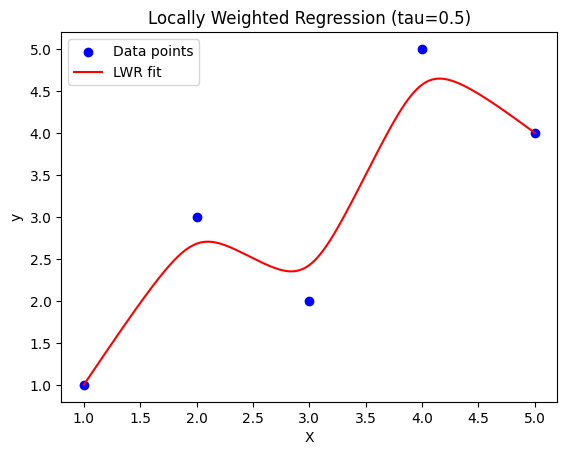

In [9]:
# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 3, 2, 5, 4])
# Plot LWR
plot_lwr(X, y, tau=0.5)

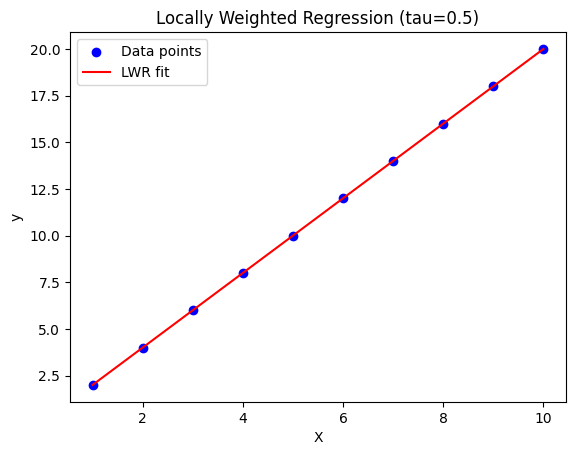

In [10]:
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])  # y = 2x
plot_lwr(X, y, tau=0.5)

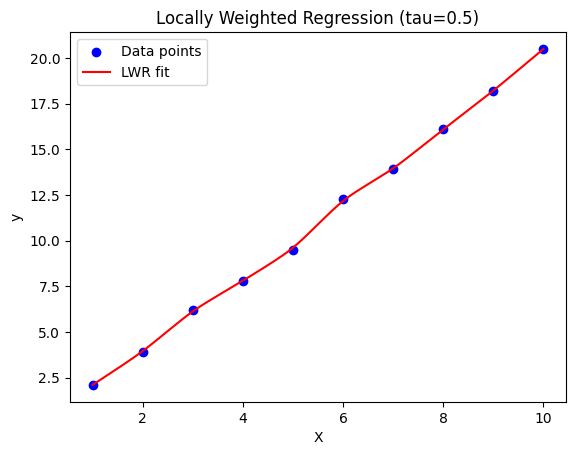

In [11]:
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([2.1, 3.9, 6.2, 7.8, 9.5, 12.3, 13.9, 16.1, 18.2, 20.5])  # Approx. y = 2x + noise
plot_lwr(X, y, tau=0.5)


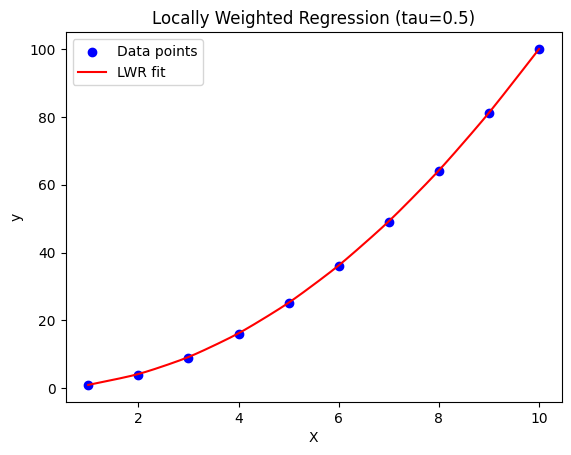

In [12]:
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100])  # y = x^2
plot_lwr(X, y, tau=0.5)

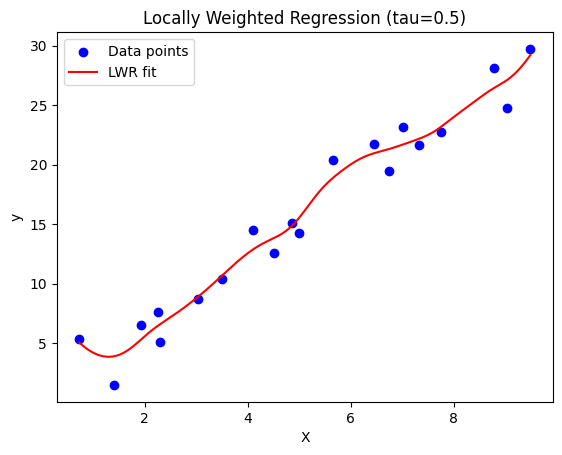

In [13]:
X = np.random.rand(20, 1) * 10  # Random values between 0 and 10
y = 3 * X.flatten() + np.random.randn(20) * 2  # y = 3x + noise
plot_lwr(X, y, tau=0.5)